📘 Project Overview
This project focuses on building a complete preprocessing pipeline for the Titanic dataset. The goal is to clean, transform, and prepare the raw data for machine learning models by applying industry-standard techniques such as handling missing values, encoding categorical variables, outlier treatment, and feature scaling.

In [54]:
import pandas as pd

In [55]:
df=pd.read_csv("../data/train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Shape and null values
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# Fill missing Age with mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True)


C:\Users\Laptop House\AppData\Local\Temp\ipykernel_9956\1002120485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [58]:
# Fill missing Embarked values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\Laptop House\AppData\Local\Temp\ipykernel_9956\5246634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [59]:
# Drop the Cabin column as too much missing values more tha 75 %
df.drop(columns=['Cabin'], inplace=True)


In [60]:
# Check if any duplicates exist
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [61]:
# Convert the 'Sex' column from categorical text to numerical labels:
# 'male' becomes 0, 'female' becomes 1 — this is called Label Encoding.
# This is important because machine learning models work with numerical values, not text.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Perform One-Hot Encoding on the 'Embarked' column:
# This creates separate binary columns for each unique value in 'Embarked' (like C, Q, S).
# We use drop_first=True to drop the first category to avoid the "dummy variable trap",
# which can introduce multicollinearity in linear models.
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [62]:
# Drop columns not needed for model training
df.drop(columns=['Name', 'Ticket'], inplace=True)


In [63]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize and apply scaler
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [64]:
# Show cleaned and preprocessed data
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.497793,0.432793,-0.473674,-0.502445,False,True
1,2,1,1,1,0.715048,0.432793,-0.473674,0.786845,False,False
2,3,1,3,1,-0.194583,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,1,0.487640,0.432793,-0.473674,0.420730,False,True
4,5,0,3,0,0.487640,-0.474545,-0.473674,-0.486337,False,True


In [65]:
# Separate target and features
X = df.drop('Survived', axis=1)
y = df['Survived']


In [66]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Show the shape of each split to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)


In [68]:
from sklearn.linear_model import LogisticRegression

# Increase iterations
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[89 16]
 [19 55]]


In [77]:
import os

# Create 'visuals' folder if it doesn't exist
if not os.path.exists("visualizations"):
    os.makedirs("visualizations")


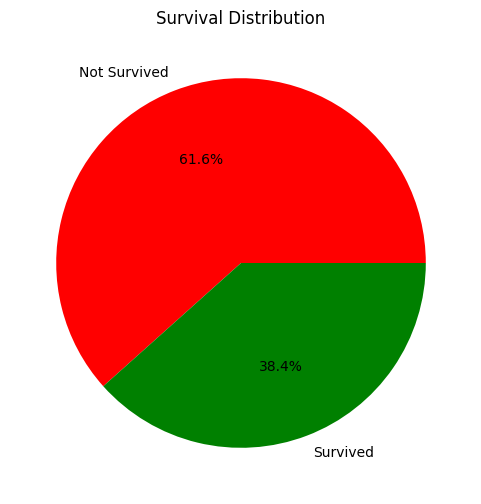

In [91]:
import matplotlib.pyplot as plt

survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Distribution')
plt.savefig("../visualizations/survival_pie_chart.png", bbox_inches='tight')
plt.show()


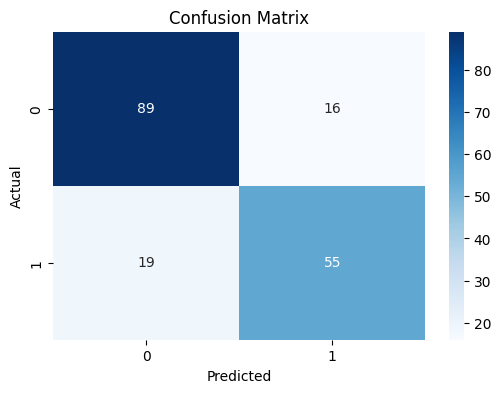

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../visualizations/confusion_matrix.png", bbox_inches='tight')
plt.show()


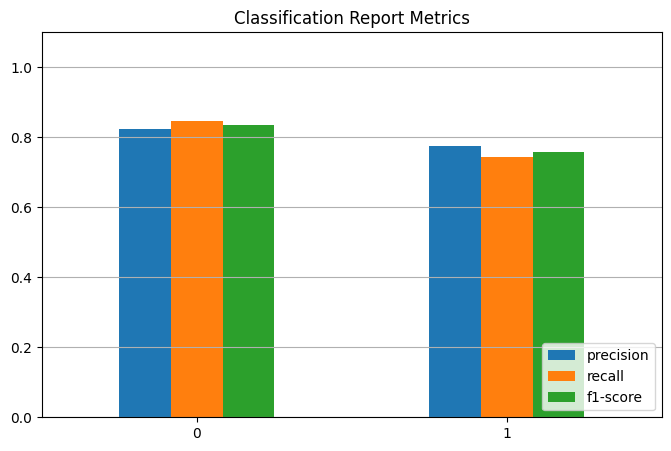

In [89]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:2]  # Only class 0 and 1

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("Classification Report Metrics")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.savefig("../visualizations/classification_report_metrics.png", bbox_inches='tight')
plt.show()


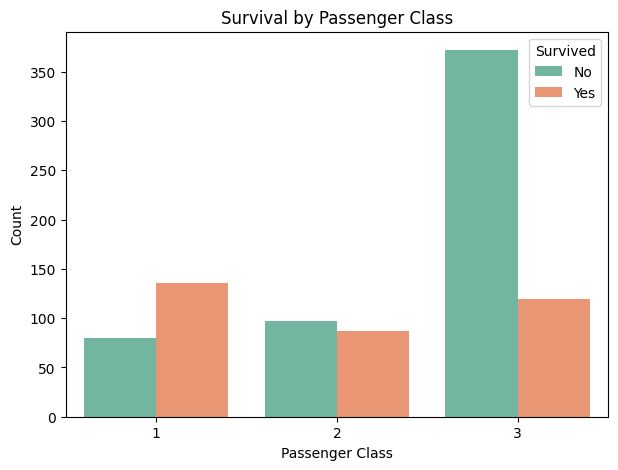

In [88]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig("../visualizations/survival_by_class.png", bbox_inches='tight')
plt.show()


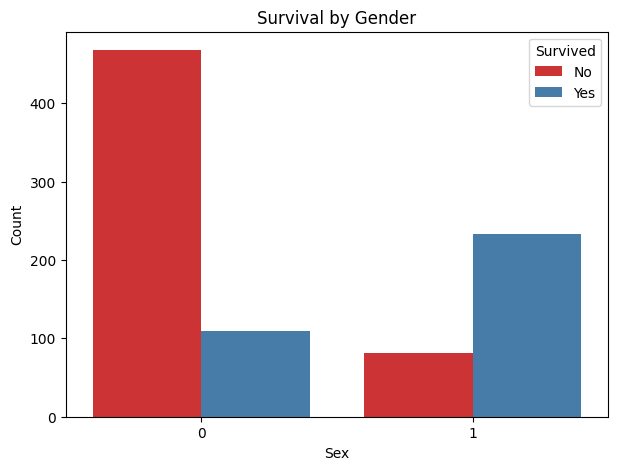

In [87]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig("../visualizations/survival_by_gender.png", bbox_inches='tight')
plt.show()
